In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [48]:
df = pd.read_csv('ASA_estadisticasPasajeros(35).csv')

In [49]:
df.head()

,Anio mes,Codigo IATA,Descripcion,Estado,Pasajeros nacionales,Pasajeros internacionales
0,201501,CEN,Ciudad Obregon,Sonora,17149,721
1,201501,CLQ,Colima,Colima,8486,124
2,201501,CME,Ciudad del Carmen,Campeche,56079,3126
3,201501,CPE,Campeche,Campeche,13264,215
4,201501,CTM,Chetumal,Quintana Roo,13153,0


In [50]:
df.loc[df['Codigo IATA']=='CPE']

,Anio mes,Codigo IATA,Descripcion,Estado,Pasajeros nacionales,Pasajeros internacionales
3,201501,CPE,Campeche,Campeche,13264,215
21,201502,CPE,Campeche,Campeche,12797,206
39,201503,CPE,Campeche,Campeche,15863,304
57,201504,CPE,Campeche,Campeche,13750,264
75,201505,CPE,Campeche,Campeche,14788,258
93,201506,CPE,Campeche,Campeche,13571,180
111,201507,CPE,Campeche,Campeche,16645,237
129,201508,CPE,Campeche,Campeche,15269,310
147,201509,CPE,Campeche,Campeche,14174,240
165,201510,CPE,Campeche,Campeche,16618,283


In [51]:
df['Anio mes']=df['Anio mes'].astype(int)

In [52]:
df = df[df['Anio mes']>=201801]

In [53]:
df.shape

(228, 6)

In [54]:
df['total_pasajeros']=df[['Pasajeros nacionales','Pasajeros internacionales']].sum(axis=1)

In [55]:
df['pct_int']=df['Pasajeros internacionales']/df.total_pasajeros

In [56]:
aux=df[['Descripcion','total_pasajeros','pct_int']].groupby('Descripcion').agg(['mean','median'])

In [57]:
catalogo = df[['Descripcion','Estado']].drop_duplicates()

In [58]:
aux.reset_index(inplace=True)
catalogo.reset_index(inplace=True,drop=True)

In [59]:
lst_df=[]
for c in ['pct_int','total_pasajeros']:
    d=aux[c].copy()
    d.rename(columns=dict(zip(list(d.columns),["%s_%s"%(x,c) for x in list(d.columns)])),inplace=True)
    lst_df.append(d)

In [60]:
X=lst_df[0].merge(lst_df[1],left_index=True,right_index=True,how='inner')

In [61]:
sc = StandardScaler()
mm = MinMaxScaler()

In [62]:
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [63]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [64]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [65]:
pca.explained_variance_ratio_.cumsum()

array([0.54930009, 0.99993918])

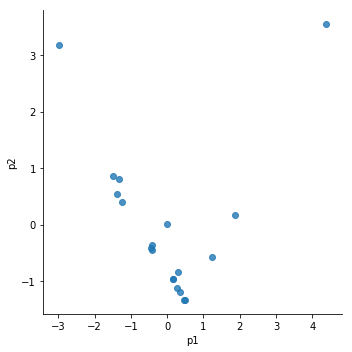

In [66]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

In [67]:
mds=MDS(n_components=2)

In [68]:
Xm=pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

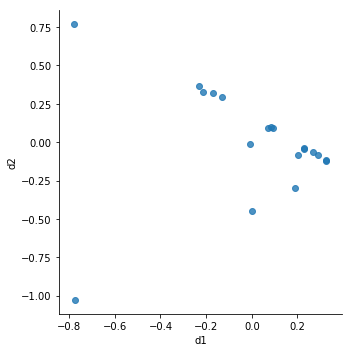

In [69]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

In [70]:
lst_in =[]
for k in range(2,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

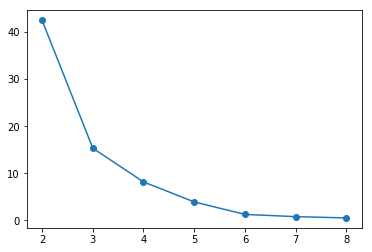

In [71]:
plt.plot(range(2,9),lst_in,marker='o')

In [72]:
km = KMeans(n_clusters=4)

In [73]:
km.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
Xs['km']=km.predict(Xs)
Xs['desc']=aux['Descripcion']
Xs=Xs.merge(catalogo,left_on='desc',right_on='Descripcion',how='inner')

In [75]:
Xs.groupby('km').mean()

,mean_pct_int,median_pct_int,mean_total_pasajeros,median_total_pasajeros
km,,,,
0,-0.202511,-0.204199,-0.514974,-0.516883
1,0.108561,0.104606,3.074018,3.078941
2,3.956752,3.966171,-0.406621,-0.409172
3,-0.358169,-0.354047,1.006815,1.012427


In [76]:
Xs.pivot_table(index='Estado',columns='km',aggfunc='count',values='mean_pct_int')

km,0,1,2,3
Estado,,,,
Baja California Sur,NaN,NaN,1.0,NaN
Campeche,1.0,NaN,NaN,1.0
Colima,1.0,NaN,NaN,NaN
Michoacan,1.0,NaN,NaN,NaN
Nayarit,1.0,NaN,NaN,NaN
Oaxaca,1.0,NaN,NaN,1.0
Puebla,1.0,1.0,NaN,NaN
Quintana Roo,NaN,NaN,NaN,1.0
San Luis Potosi,1.0,NaN,NaN,NaN


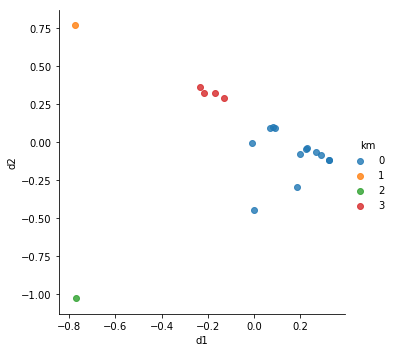

In [77]:
Xm['km']=km.predict(sc.transform(X))

sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue='km')

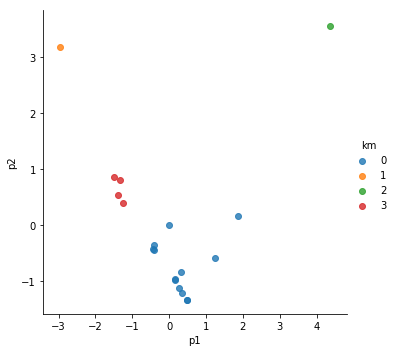

In [78]:
Xp['km']=km.predict(sc.transform(X))

sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='km')

In [79]:
gmm = GaussianMixture(n_components=4)

In [80]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [81]:
gmm.fit(Xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [82]:
Xp['gm'] = gmm.predict(Xs)

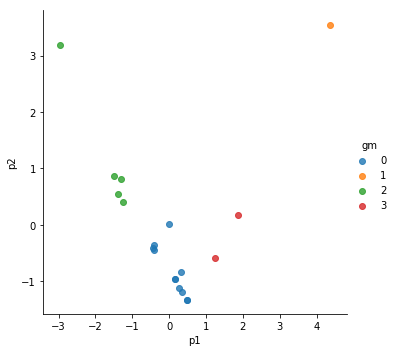

In [83]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='gm')

In [84]:
Xs['gm'] =gmm.predict(Xs)
Xs = Xs.merge(df[['Estado']].reset_index(drop=True),
              left_index=True,right_index=True)

In [85]:
Xs.head()

,mean_pct_int,median_pct_int,mean_total_pasajeros,median_total_pasajeros,gm,Estado
0,-0.387769,-0.382949,0.037462,0.017323,0,Sonora
1,-0.429984,-0.420610,0.951234,0.988536,2,Colima
2,-0.254708,-0.257774,1.047693,1.079150,2,Campeche
3,-0.259416,-0.269357,-0.578073,-0.571993,0,Campeche
4,-0.316939,-0.317350,1.189759,1.164850,2,Quintana Roo


In [87]:
aux = Xs.pivot_table(aggfunc='count',index='Estado',columns='gm',values='mean_pct_int',fill_value=0)

In [88]:
aux.reset_index(inplace=True)

In [90]:
for c in range(4):
    aux[c]/=aux[c].sum()

In [91]:
aux

gm,Estado,0,1,2,3
0,Baja California Sur,0.000000,1.0,0.0,0.0
1,Campeche,0.090909,0.0,0.2,0.0
2,Colima,0.000000,0.0,0.2,0.0
3,Michoacan,0.090909,0.0,0.0,0.0
4,Nayarit,0.090909,0.0,0.0,0.0
5,Oaxaca,0.090909,0.0,0.2,0.0
6,Puebla,0.090909,0.0,0.2,0.0
7,Quintana Roo,0.000000,0.0,0.2,0.0
8,San Luis Potosi,0.090909,0.0,0.0,0.0
9,Sonora,0.181818,0.0,0.0,0.5
